# Heart attack analysis and prediction

## Importing Dataset

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import keras
import tensorflow
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data = pd.read_csv('heart.csv')

# For displaying all the columns
pd.set_option('display.max_columns', None)

# Display the first few rows
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

## Dimension of the dataset

In [11]:
# Get dimension of dataset
print(data.shape)

(303, 14)


## Columns of the dataset

In [14]:
# Get the coloumns of the dataset
print(data.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


## Null values

In [17]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [19]:
# Display summary statistics
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [21]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Identifying the categorical variables

In [24]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Convert categorical variables to dummy/one-hot encoded variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the transformed dataset
data_encoded.head()

age  trtbps  chol  thalachh  oldpeak  output  sex_1   cp_1   cp_2   cp_3  \
0   63     145   233       150      2.3       1   True  False  False   True   
1   37     130   250       187      3.5       1   True  False   True  False   
2   41     130   204       172      1.4       1  False   True  False  False   
3   56     120   236       178      0.8       1   True   True  False  False   
4   57     120   354       163      0.6       1  False  False  False  False   

   fbs_1  restecg_1  restecg_2  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  \
0   True      False      False   False  False  False  False  False  False   
1  False       True      False   False  False  False  False  False  False   
2  False      False      False   False  False   True  False  False  False   
3  False       True      False   False  False   True  False  False  False   
4  False       True      False    True  False   True  False  False  False   

   caa_4  thall_1  thall_2  thall_3  
0  False     True    False    False  
1  False    False     True    False  
2  False    False     True    False  
3  False    False     True    False  
4  False    False     True    False

## Plotting the correlation heatmap

<Axes: >

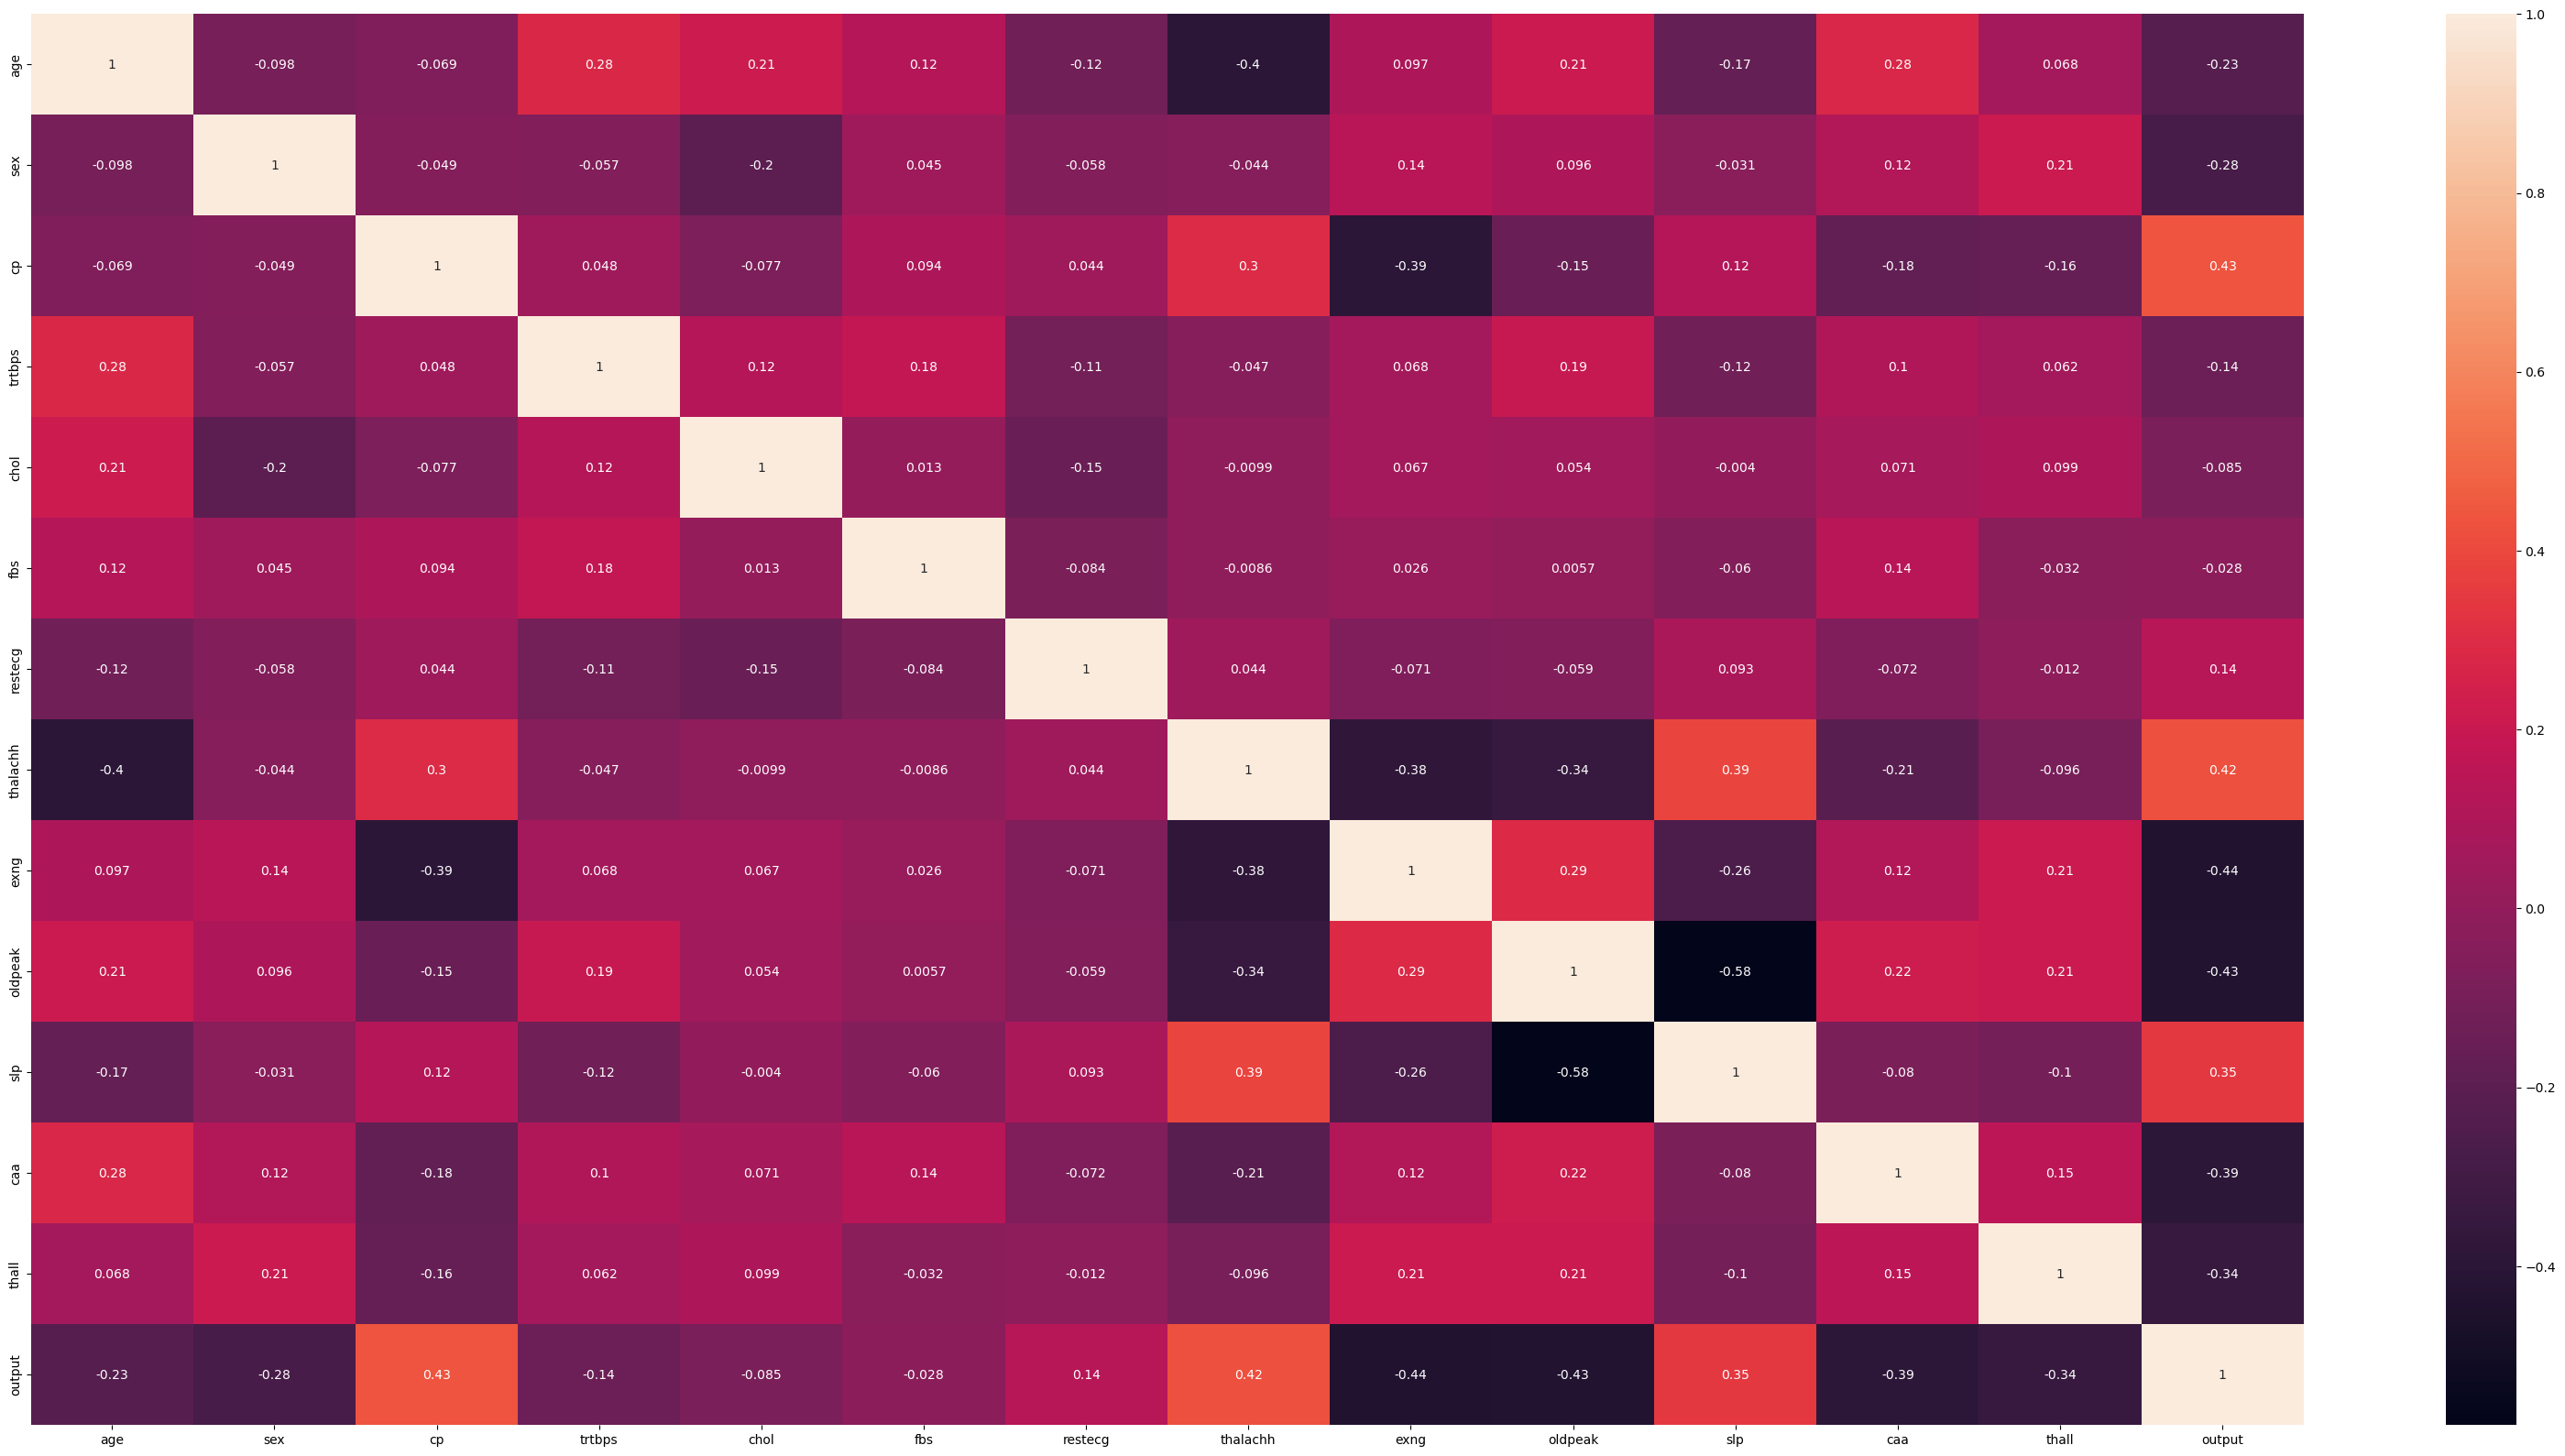

In [27]:
plt.figure(figsize = (40,20))
sns.heatmap(data.corr(), annot=True)

## Removing irrelevant coloumn

In [30]:
# Drop 'fbs' as it unnecessary
data = data.drop(['fbs'], axis=1)

# Display updated dataset
print(data.head())

   age  sex  cp  trtbps  chol  restecg  thalachh  exng  oldpeak  slp  caa  \
0   63    1   3     145   233        0       150     0      2.3    0    0   
1   37    1   2     130   250        1       187     0      3.5    0    0   
2   41    0   1     130   204        0       172     0      1.4    2    0   
3   56    1   1     120   236        1       178     0      0.8    2    0   
4   57    0   0     120   354        1       163     1      0.6    2    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1  


## Plotting the correlation heatmap (after coloumn removal)

<Axes: >

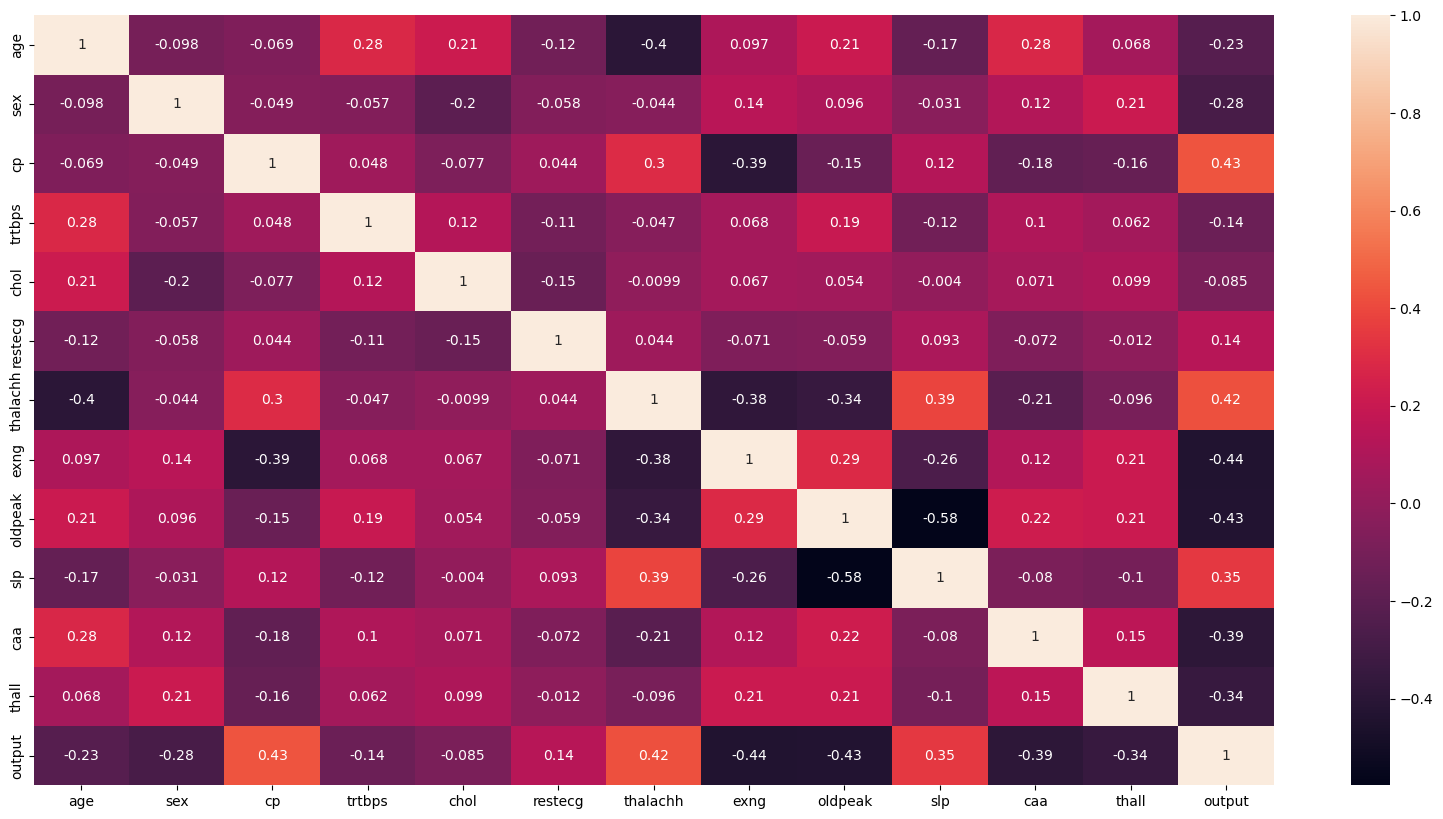

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

## Looking for relationship between age and heart disease occurence

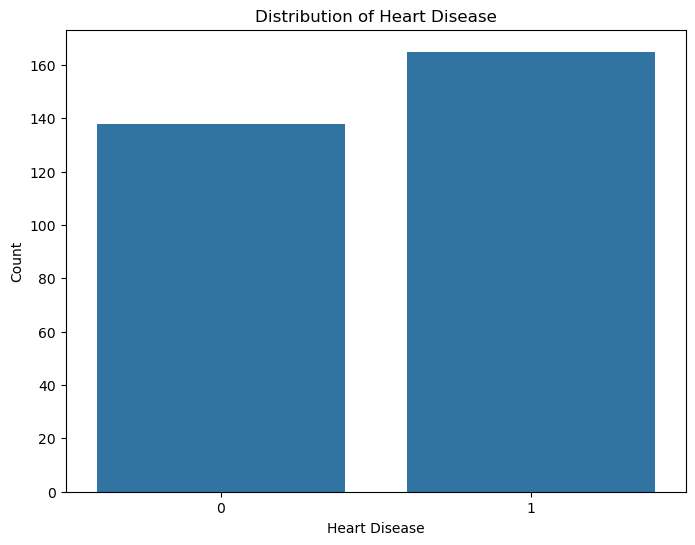

output
1    54.455446
0    45.544554
Name: proportion, dtype: float64


In [36]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

print(data['output'].value_counts(normalize=True) * 100)

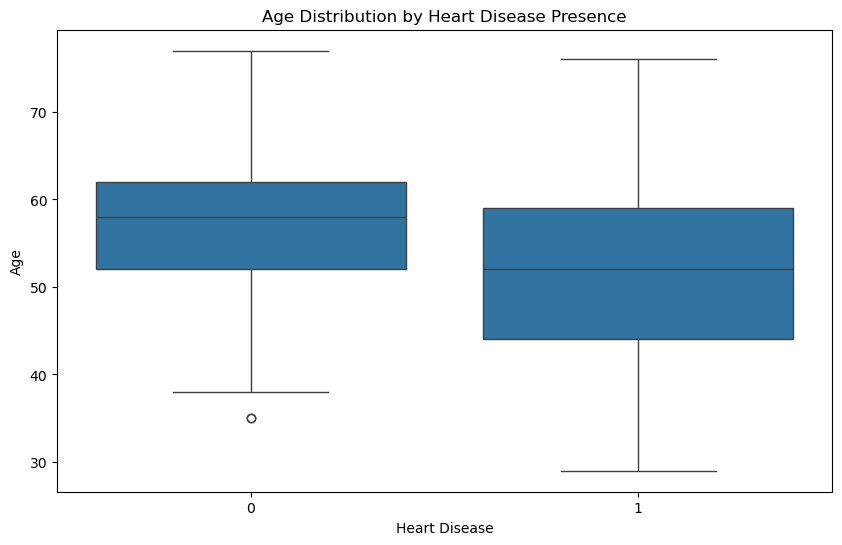

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='age', data=data)
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

## Box plot to detect outliers

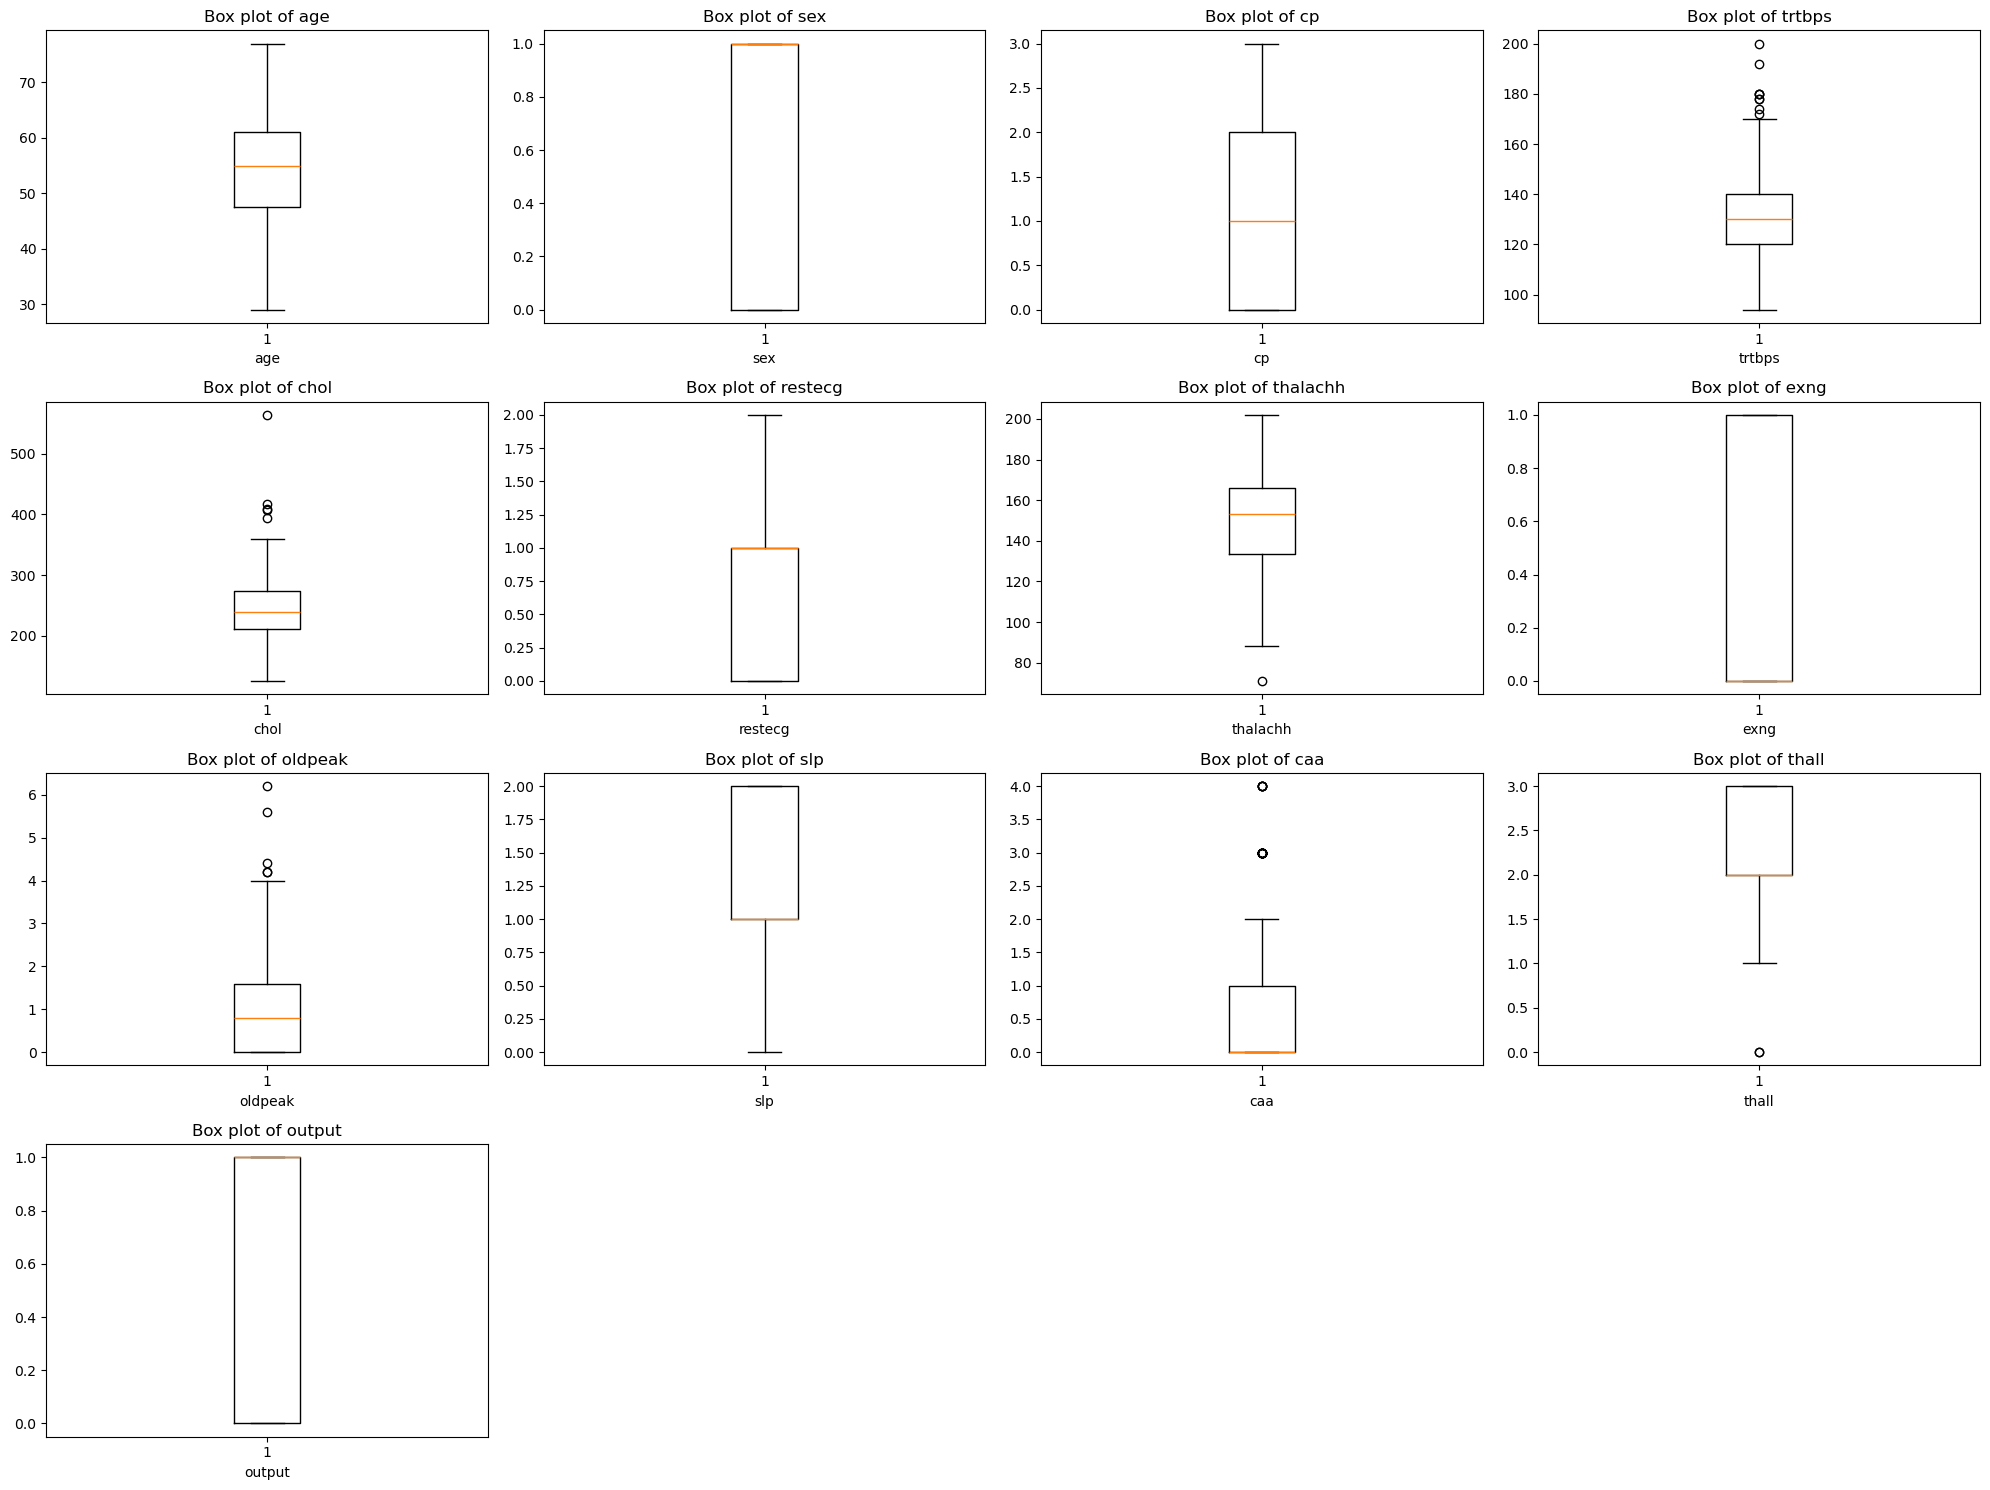

In [41]:
columns = data.columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Histogram for visualizing outliers

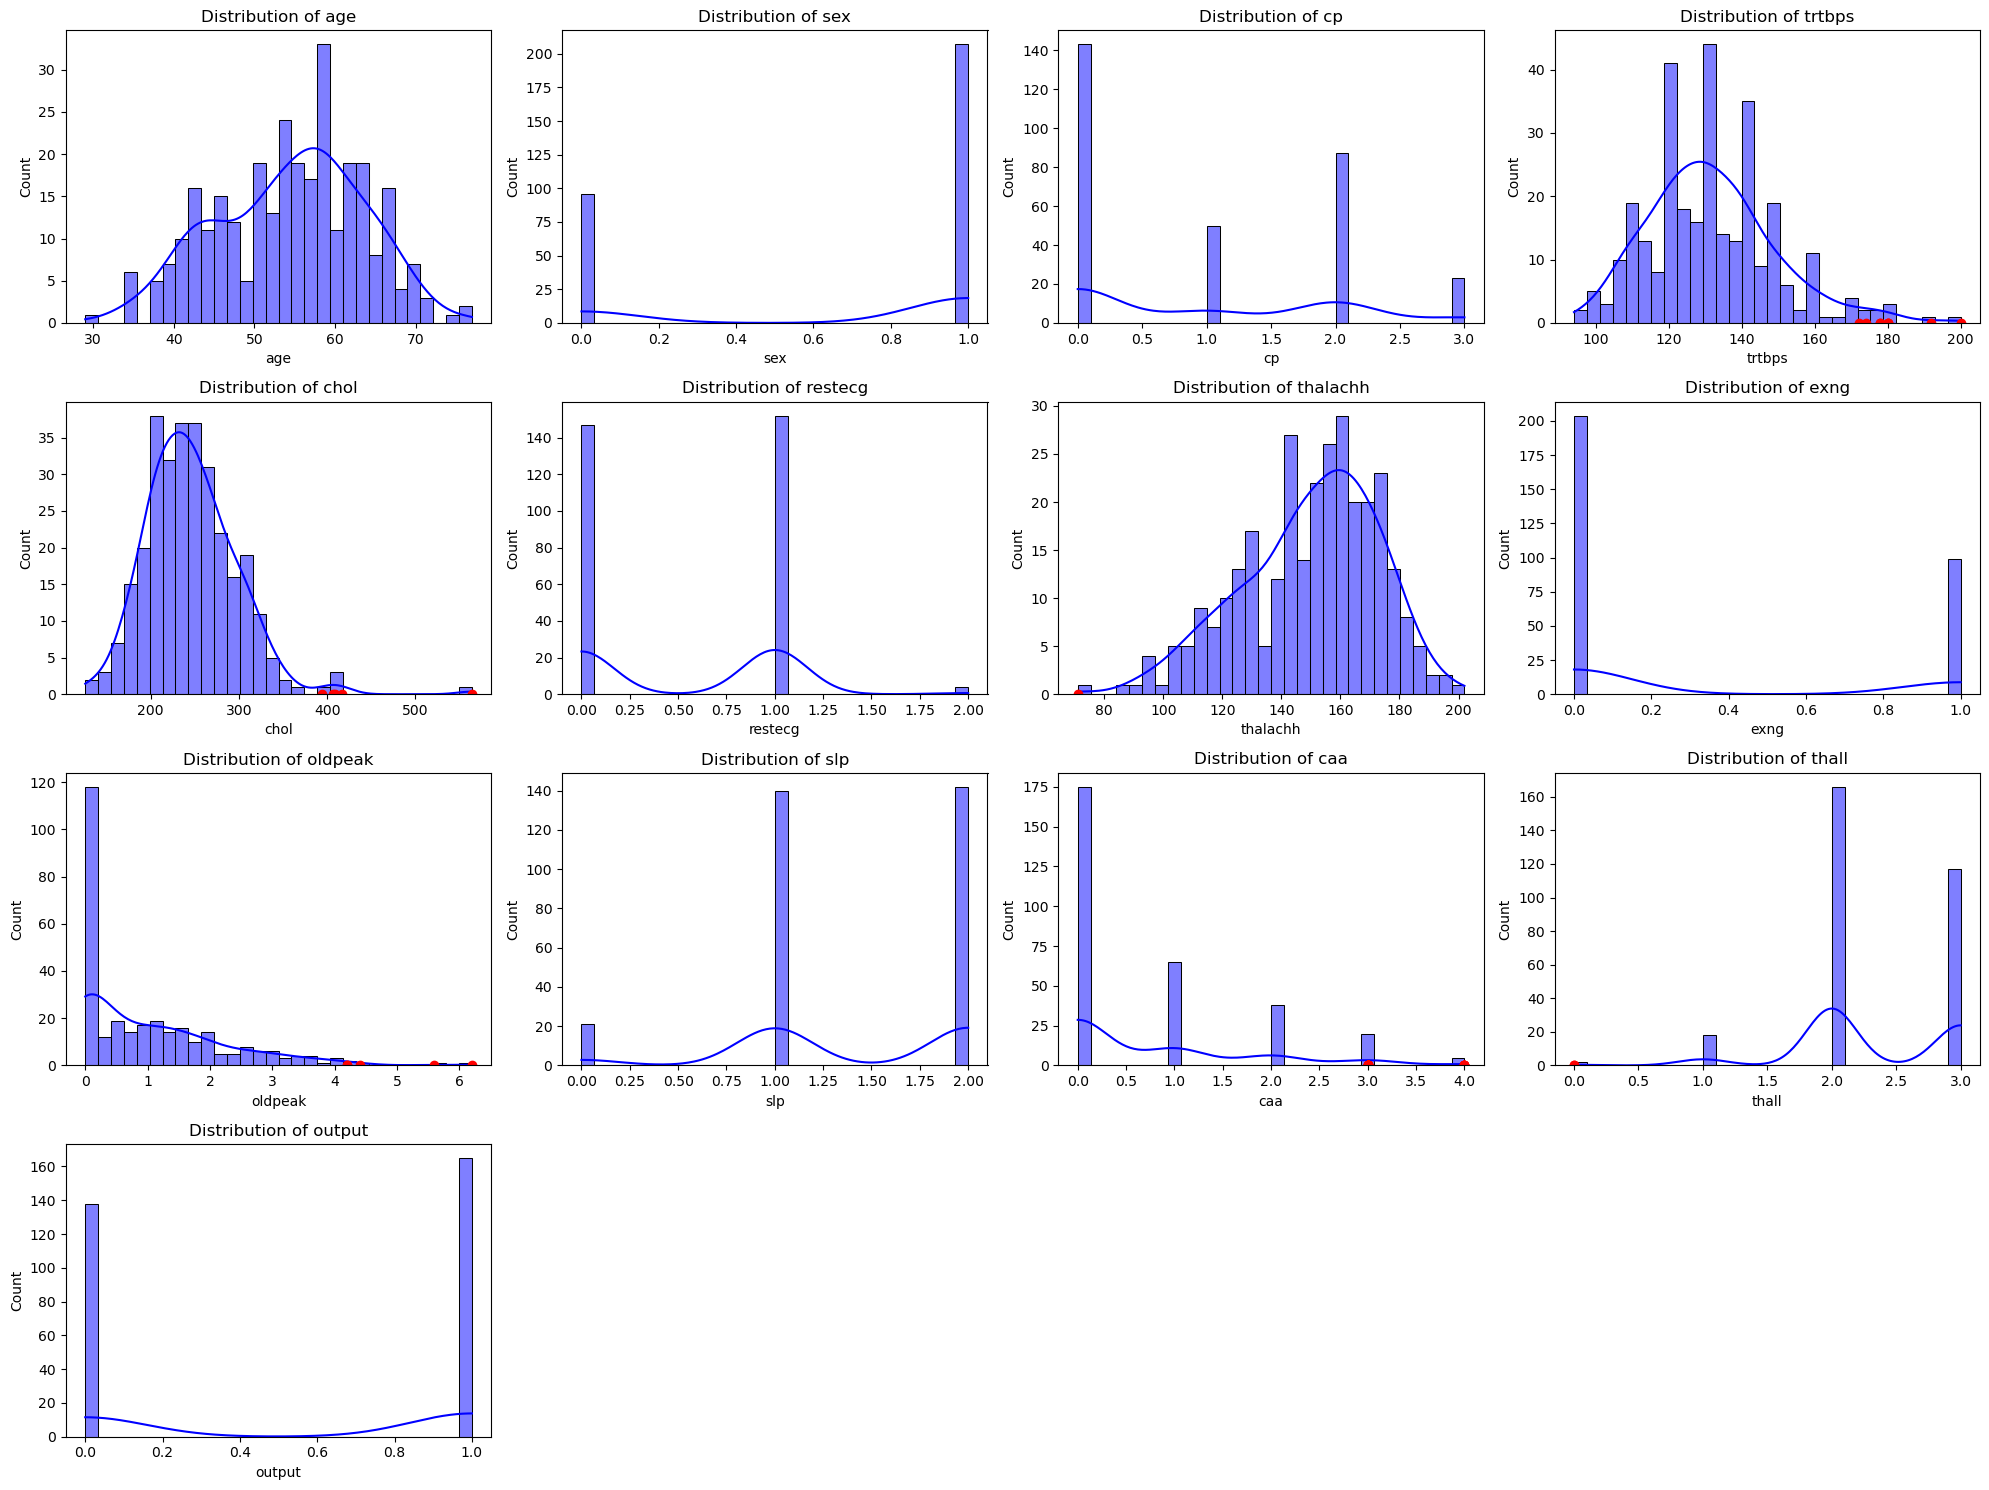

In [44]:
columns = data.columns

# Plot histograms with outliers highlighted
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue', alpha=0.5)
    
    # Calculate the IQR and define outlier thresholds
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Highlight outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    plt.scatter(outliers[column], [0]*len(outliers), color='red', label='Outliers', zorder=2)
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Removing outliers

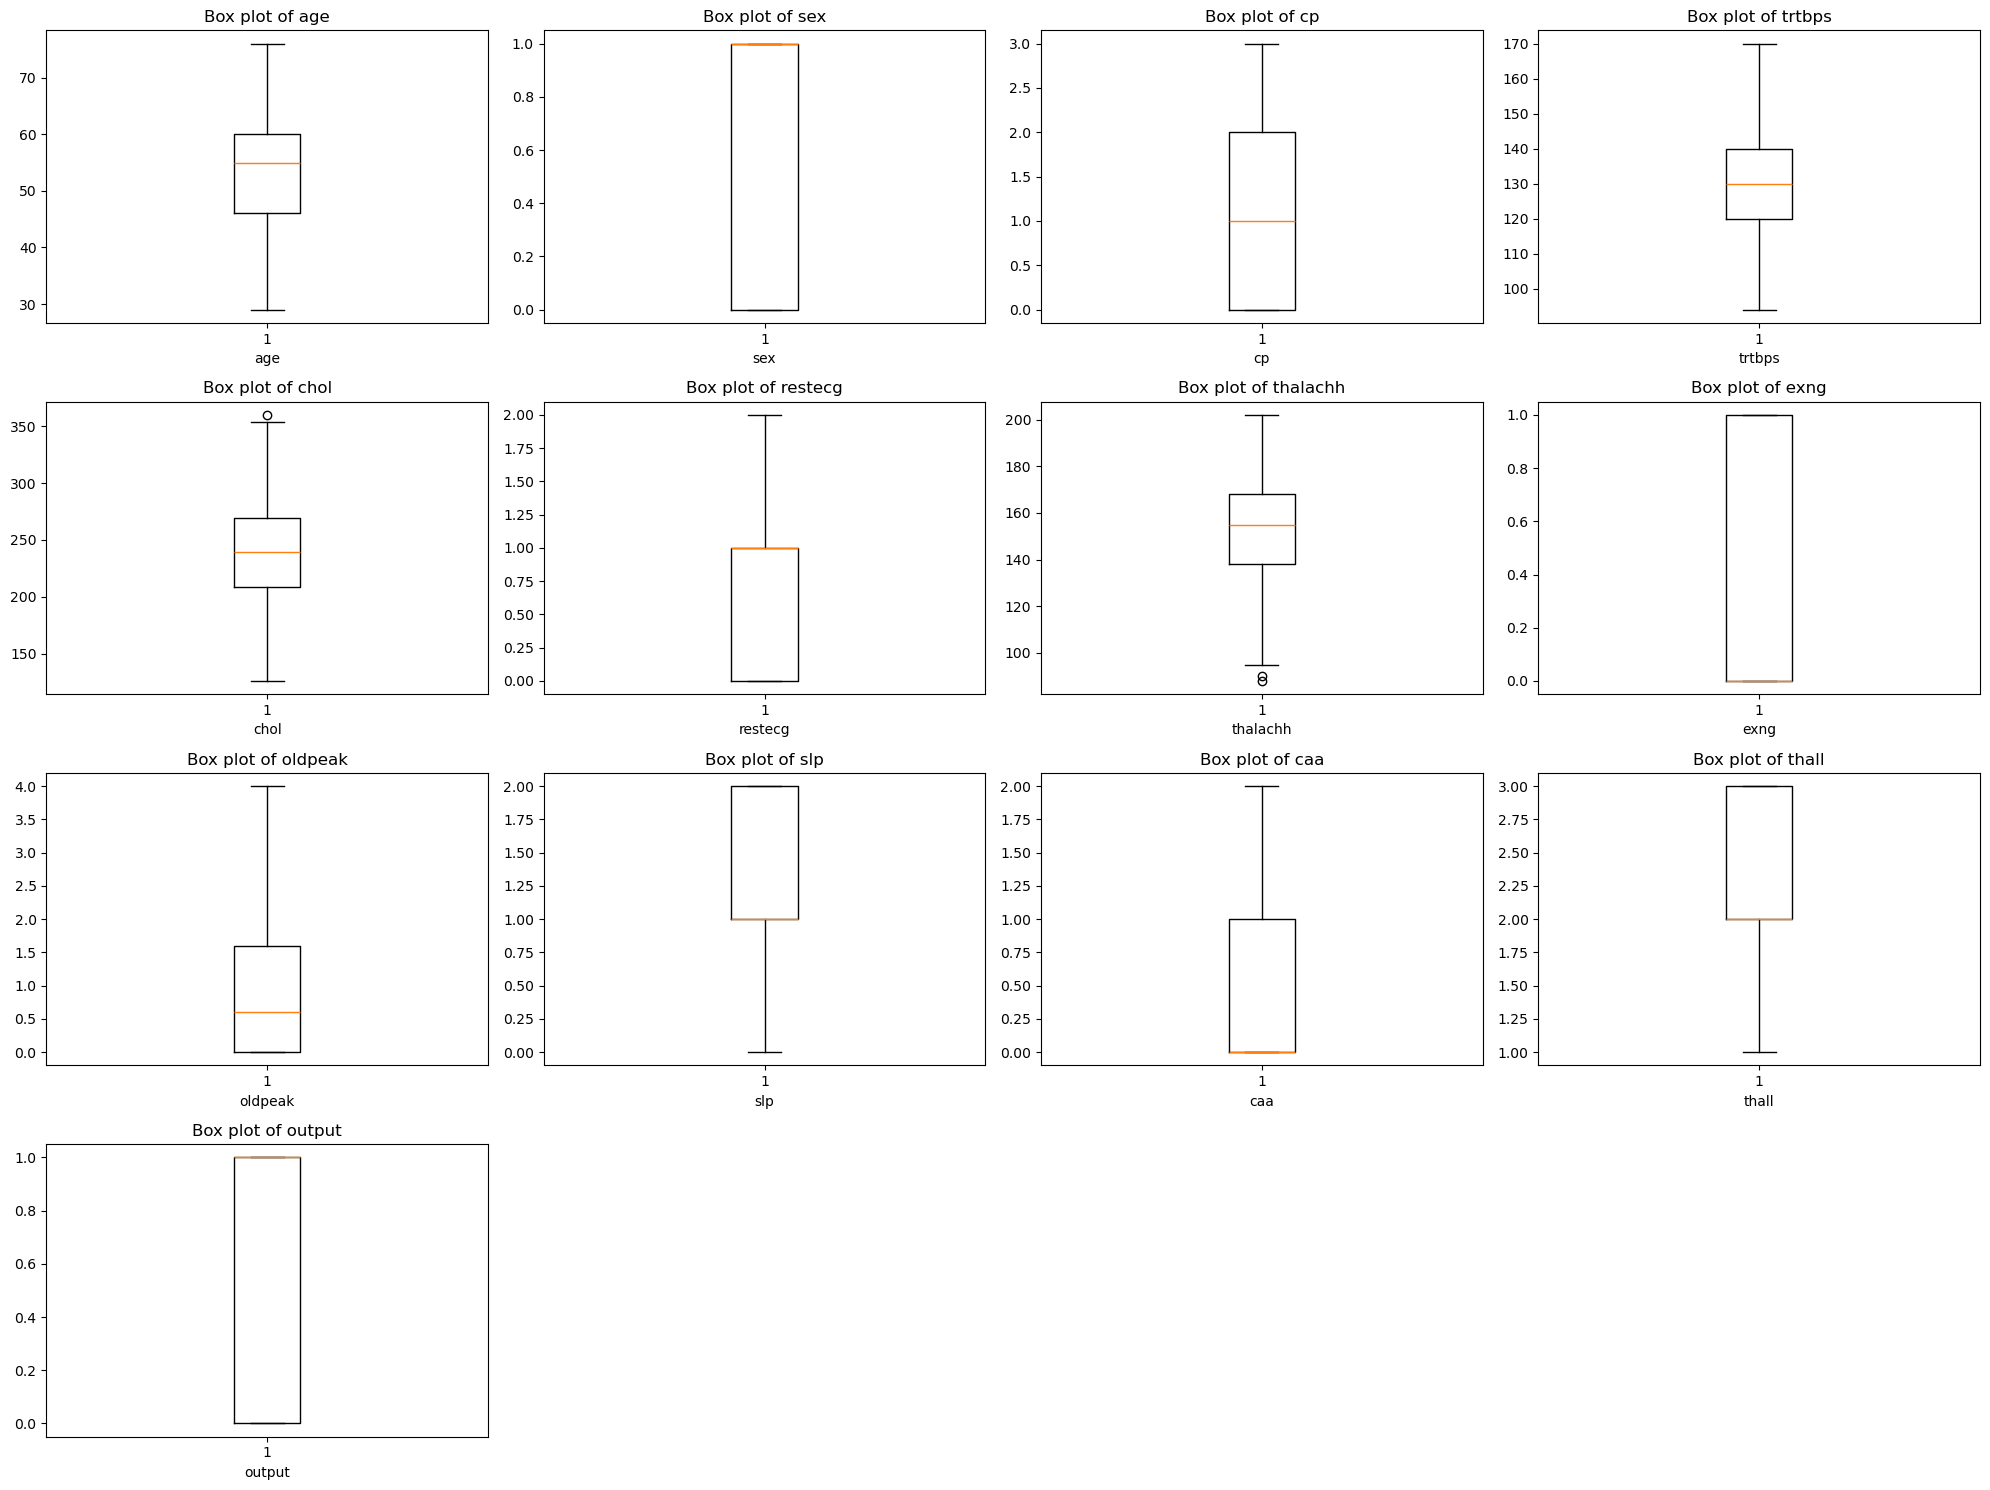

In [47]:
# Function to remove outliers using IQR
def remove_outliers(df):
    for column in df.columns:
        if df[column].dtype != 'object':  # Ensure the column is numeric
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filter out outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

data_cleaned = remove_outliers(data)

plt.figure(figsize=(20, 15))
for i, column in enumerate(data_cleaned.columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(data_cleaned[column], vert=True)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Skewness check

/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_12949/4237610173.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='blue')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_12949/4237610173.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='blue')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_12949/4237610173.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='blue')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_12949/4237610173.py:7: FutureWarning: 

`shade` is now deprecated

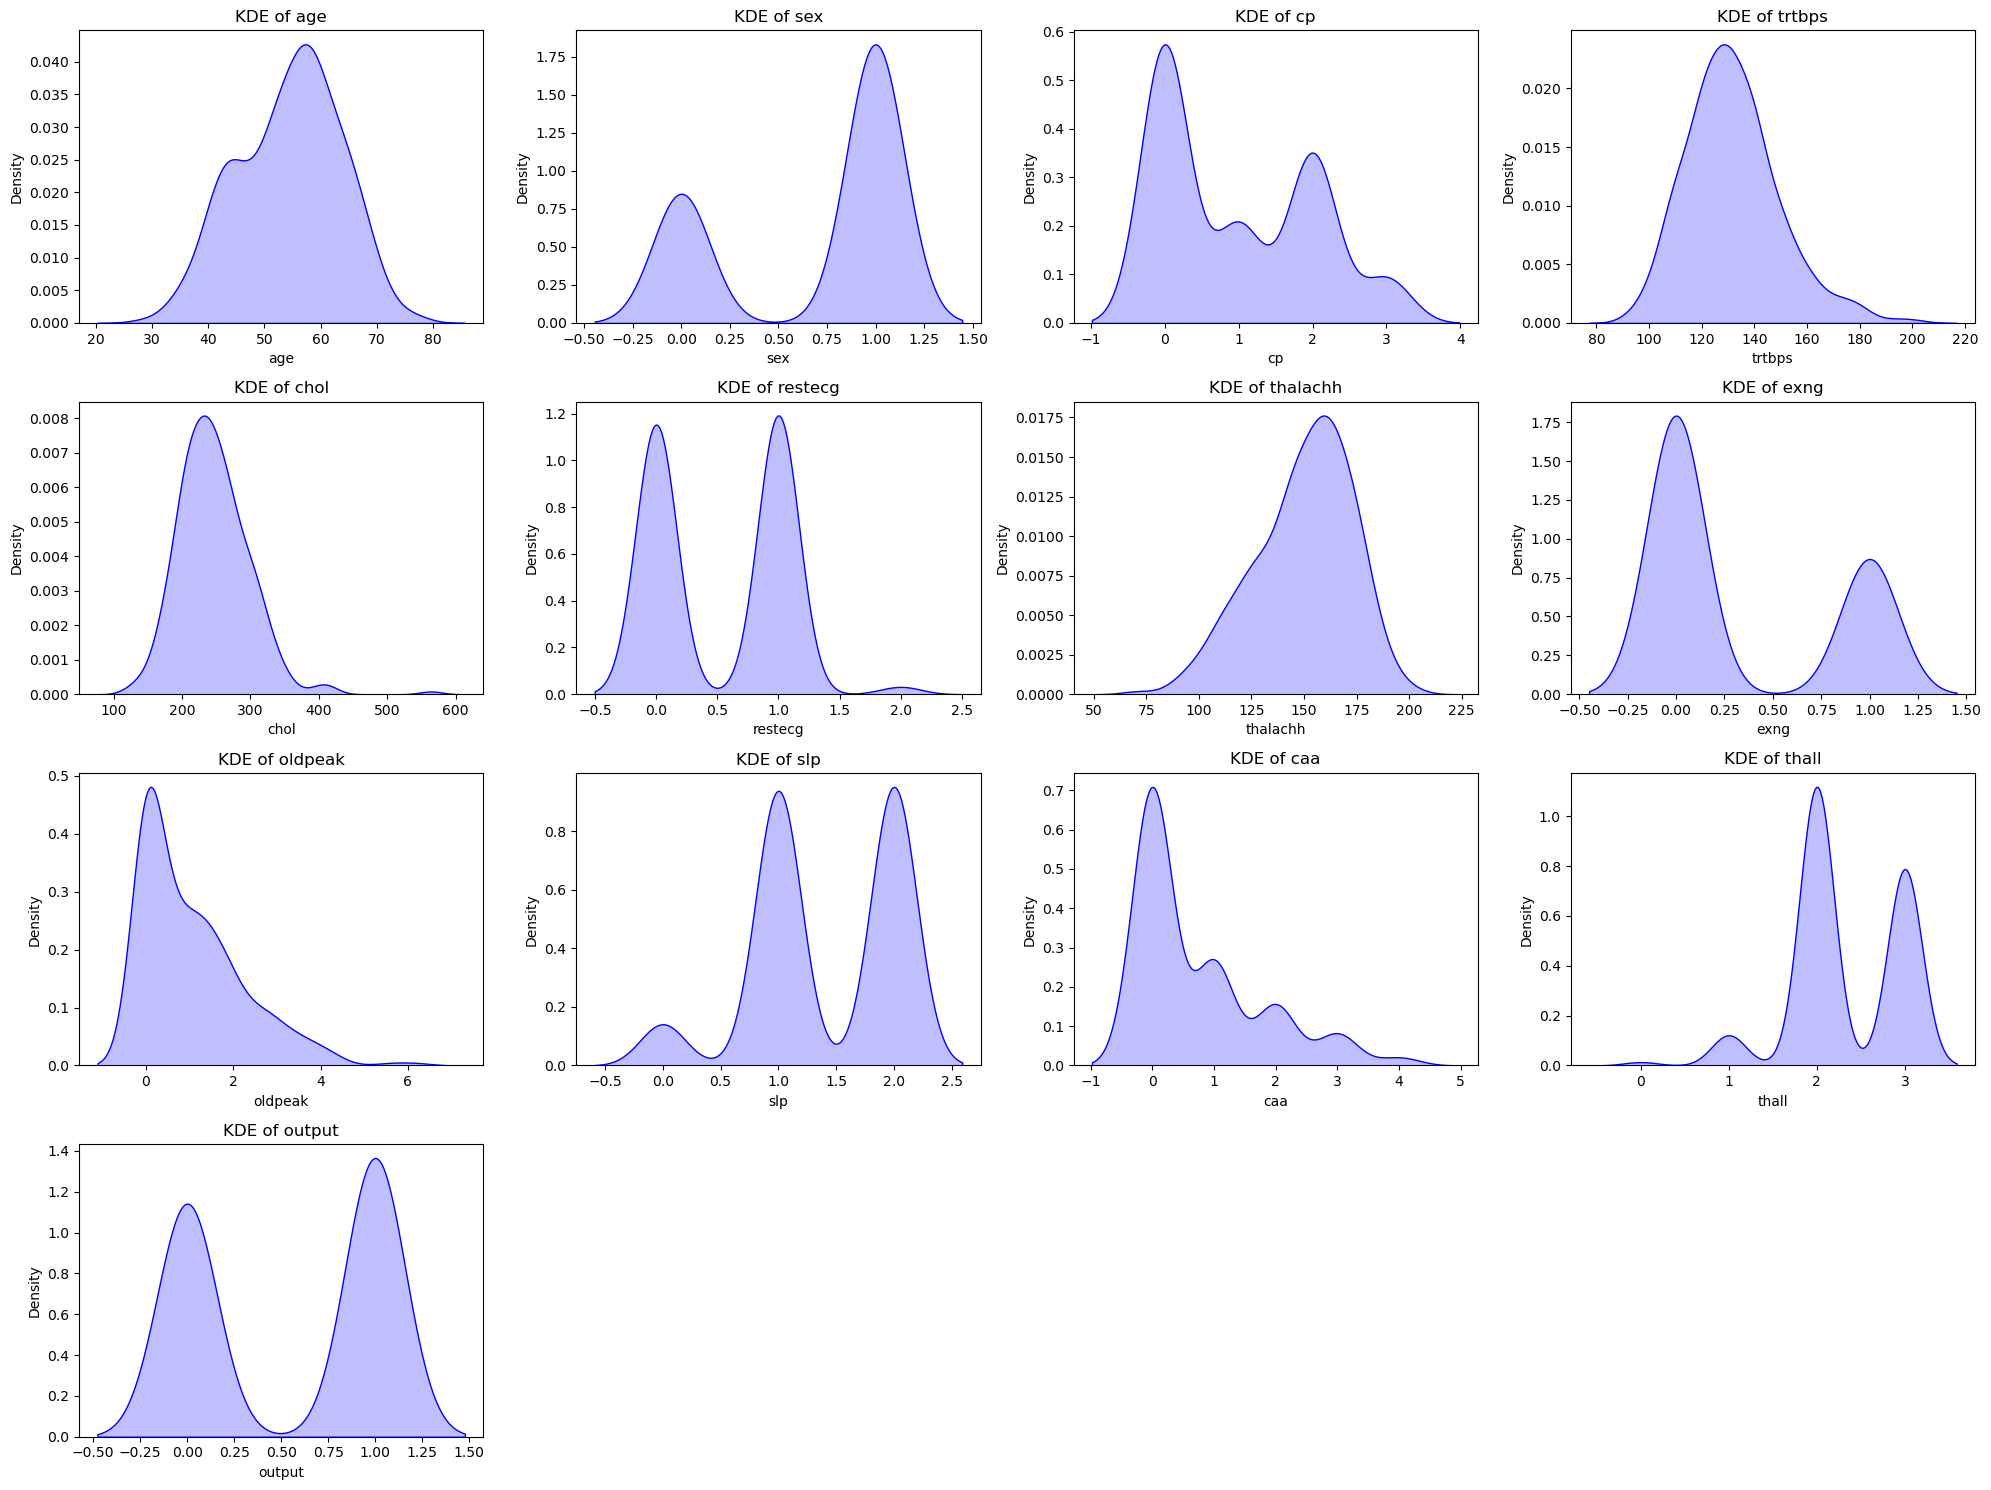

In [50]:
columns = data.columns

# Plot KDE for each column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(data[column], shade=True, color='blue')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Apply SQRT method to correct left Skewness

/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_12949/531522305.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['chol_sqrt'], shade=True, color='blue')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_12949/531522305.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['oldpeak_sqrt'], shade=True, color='green')


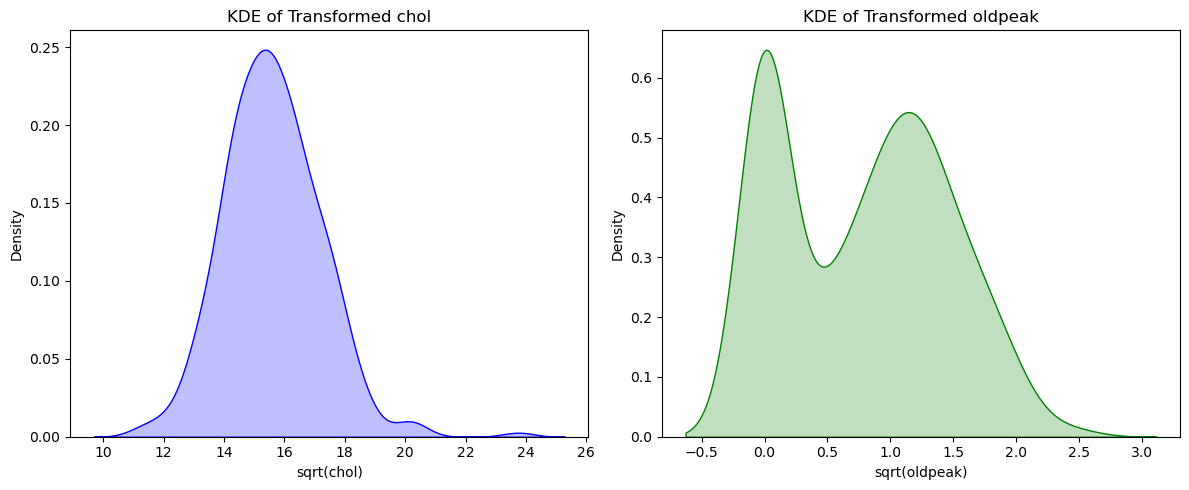

In [53]:
data['chol_sqrt'] = np.sqrt(data['chol'])
data['oldpeak_sqrt'] = np.sqrt(data['oldpeak'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data['chol_sqrt'], shade=True, color='blue')
plt.title('KDE of Transformed chol')
plt.xlabel('sqrt(chol)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data['oldpeak_sqrt'], shade=True, color='green')
plt.title('KDE of Transformed oldpeak')
plt.xlabel('sqrt(oldpeak)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Checking for class imbalance

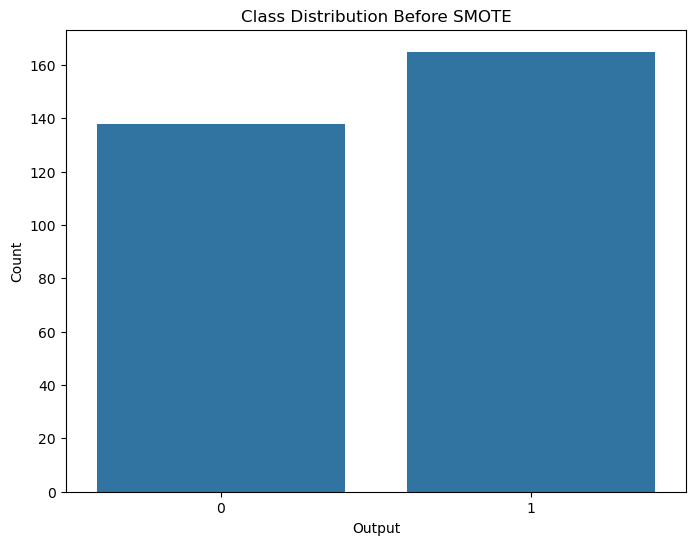

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=data)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

## Resolving class imbalance

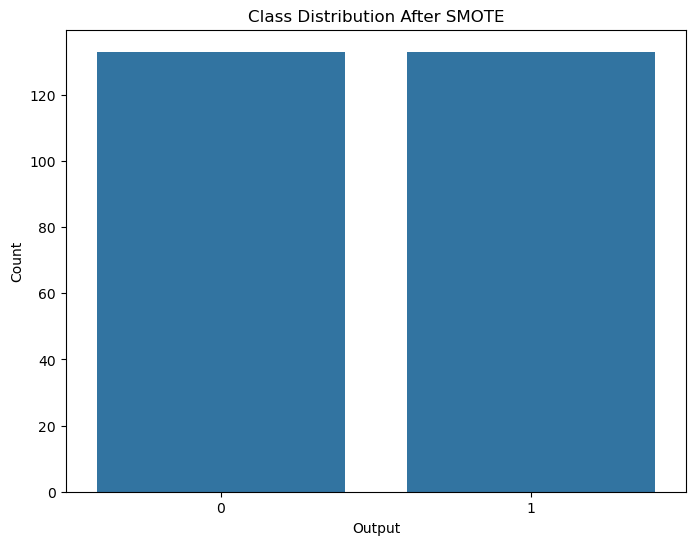

In [59]:
X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert resampled data to DataFrame for plotting
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['output'] = y_resampled

# Plot the balanced class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=resampled_data)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

## Neural Network

Epoch 1/35


/Users/sid/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6534 - loss: 0.6177 - val_accuracy: 0.7037 - val_loss: 0.5640
Epoch 2/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7220 - loss: 0.5562 - val_accuracy: 0.7037 - val_loss: 0.5044
Epoch 3/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.4675 - val_accuracy: 0.7593 - val_loss: 0.4656
Epoch 4/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.4767 - val_accuracy: 0.7593 - val_loss: 0.4310
Epoch 5/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8134 - loss: 0.4312 - val_accuracy: 0.7963 - val_loss: 0.4033
Epoch 6/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8465 - loss: 0.4076 - val_accuracy: 0.8148 - val_loss: 0.3897
Epoch 7/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8572 - loss: 0.3786 - val_accuracy: 0.7963 - val_loss: 0.3668
Epoch 8/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4289 - val_accuracy: 0.8148 - val_loss: 0.3608
Epo

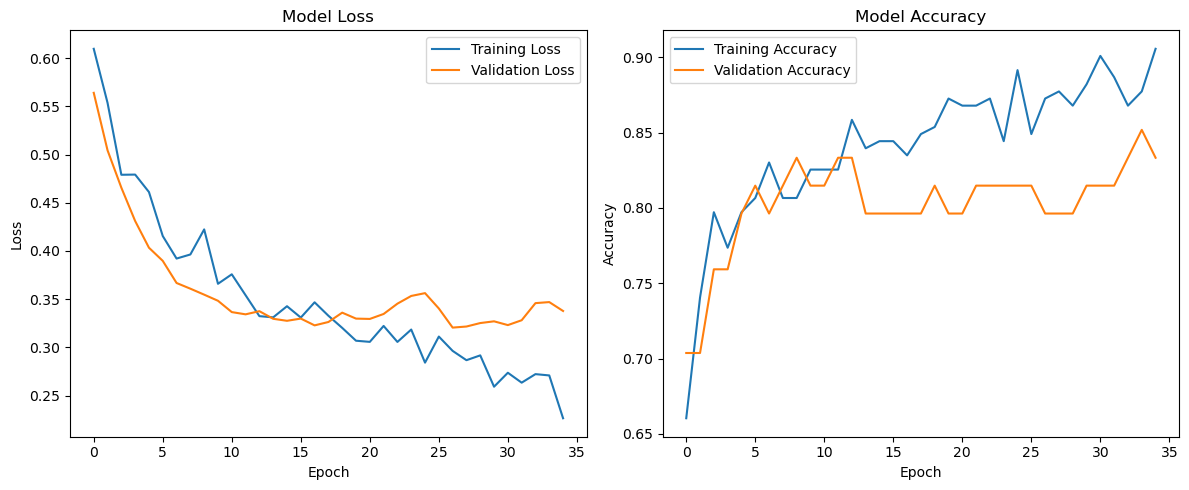

In [62]:
X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_resampled_scaled, y_resampled, validation_split=0.2, epochs=35, batch_size=16)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


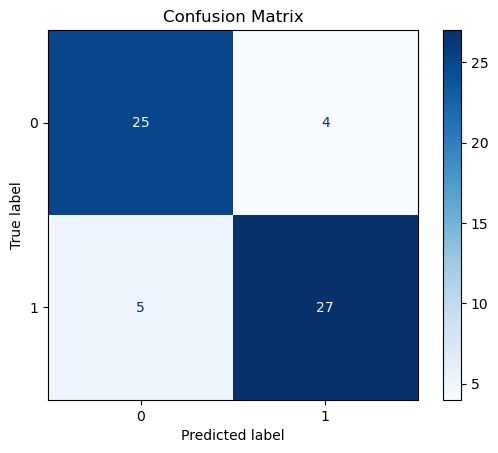

In [65]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree without pruning
dt_unpruned = DecisionTreeClassifier(random_state=42)
dt_unpruned.fit(X_train, y_train)

# Create and train the decision tree with pruning
dt_pruned = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

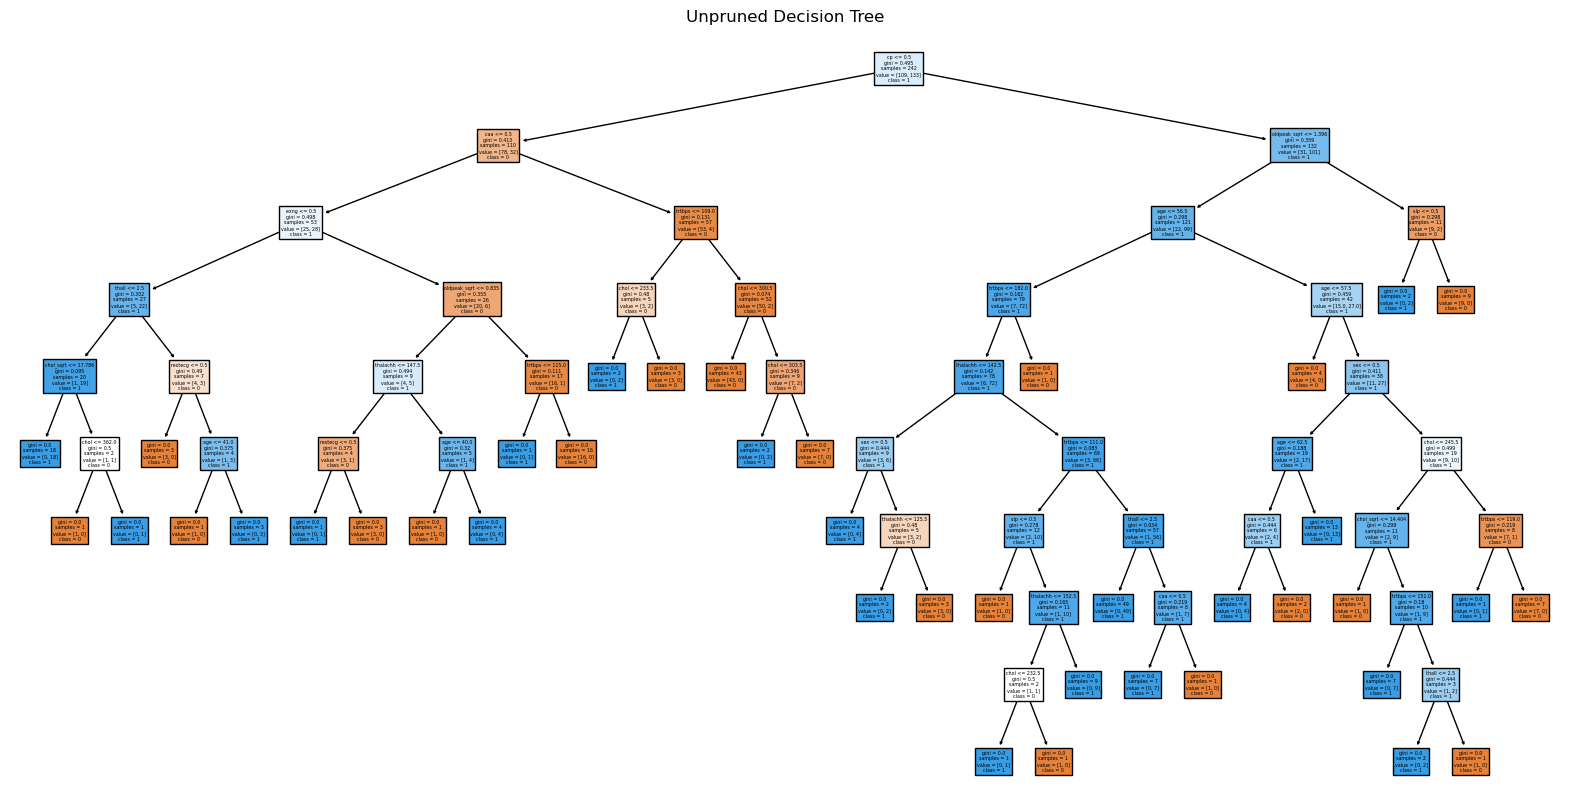

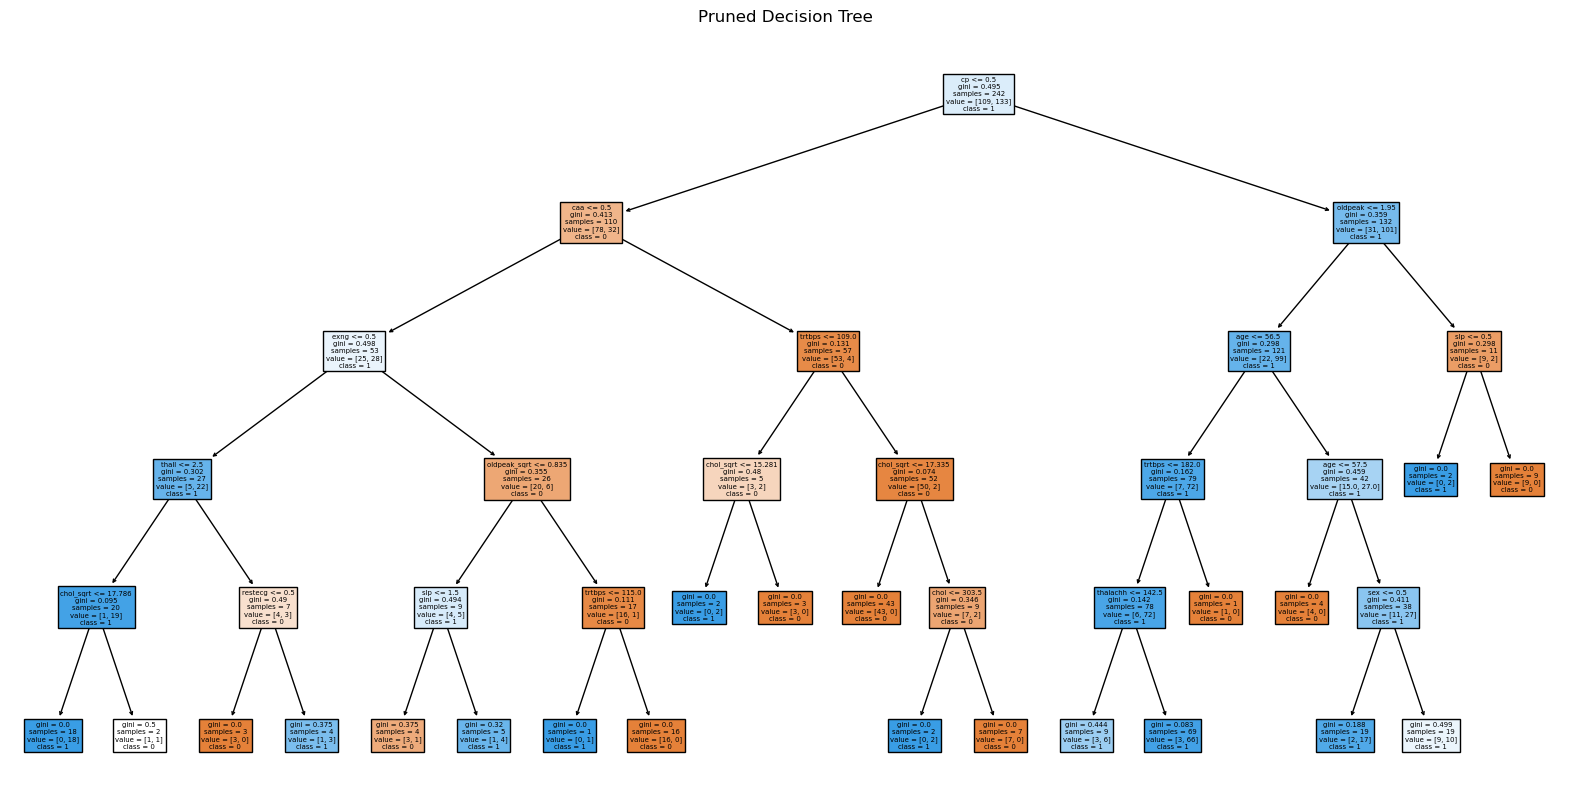

In [70]:
plt.figure(figsize=(20,10))
plot_tree(dt_unpruned, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Unpruned Decision Tree")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(dt_pruned, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Pruned Decision Tree")
plt.show()

## Comapring ANN & DT

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy of unpruned decision tree: 0.8361
Accuracy of pruned decision tree: 0.8197
Accuracy of ANN: 0.8689


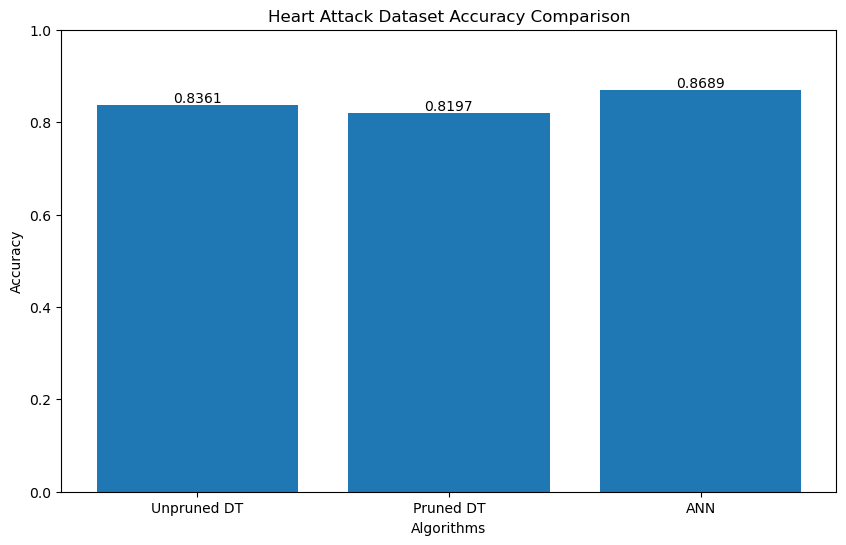

In [73]:
# Predictions
y_pred_unpruned = dt_unpruned.predict(X_test)
y_pred_pruned = dt_pruned.predict(X_test)
y_pred_ann = model.predict(X_test)

# Calculate accuracies
acc_unpruned = accuracy_score(y_test, y_pred_unpruned)
acc_pruned = accuracy_score(y_test, y_pred_pruned)
acc_ann = 0.8689

print(f"Accuracy of unpruned decision tree: {acc_unpruned:.4f}")
print(f"Accuracy of pruned decision tree: {acc_pruned:.4f}")
print(f"Accuracy of ANN: {acc_ann:.4f}")

# Plotting Accuracy Comparison
algorithms = ['Unpruned DT', 'Pruned DT', 'ANN']
accuracies = [acc_unpruned, acc_pruned, acc_ann]

plt.figure(figsize=(10,6))
plt.bar(algorithms, accuracies)
plt.title('Heart Attack Dataset Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

## Boosting Algorithm

XGBoost Classifier Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.8033
Training Precision: 1.0000
Testing Precision: 0.8098
Training Recall: 1.0000
Testing Recall: 0.8033
Training F1 Score: 1.0000
Testing F1 Score: 0.8031


/Users/sid/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:08:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


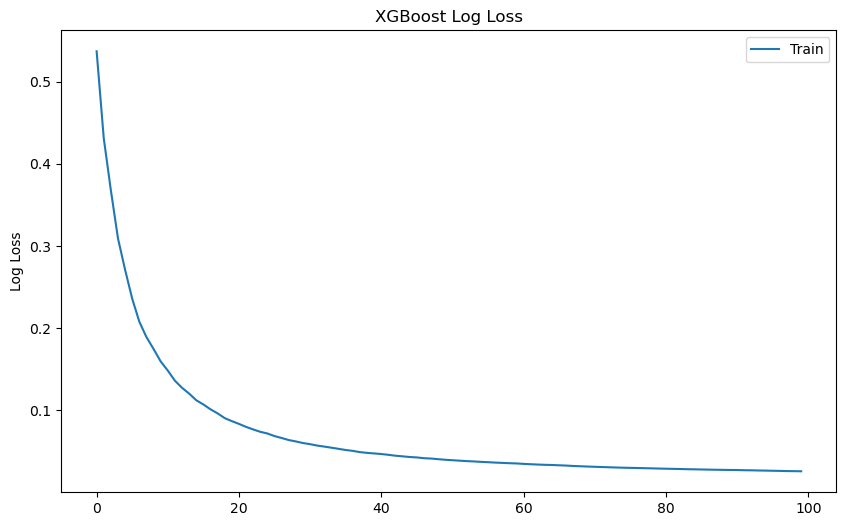

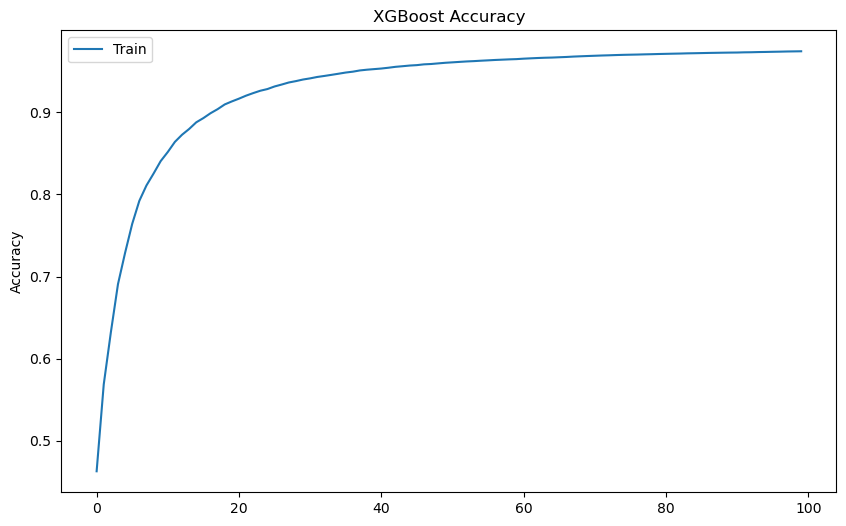

In [76]:
# Initialize and train the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=False)

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("XGBoost Classifier Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Testing Precision: {test_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Testing Recall: {test_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

# Plot training history
results = xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, [1-x for x in results['validation_0']['logloss']], label='Train')
ax.legend()
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy')
plt.show()

## Comparing ANN, DT & Boosting

Model Accuracy Comparison:
ANN Training Accuracy: 0.8689
Unpruned Decision Tree Test Accuracy: 0.8361
Pruned Decision Tree Test Accuracy: 0.8197
XGBoost Training Accuracy: 0.8033


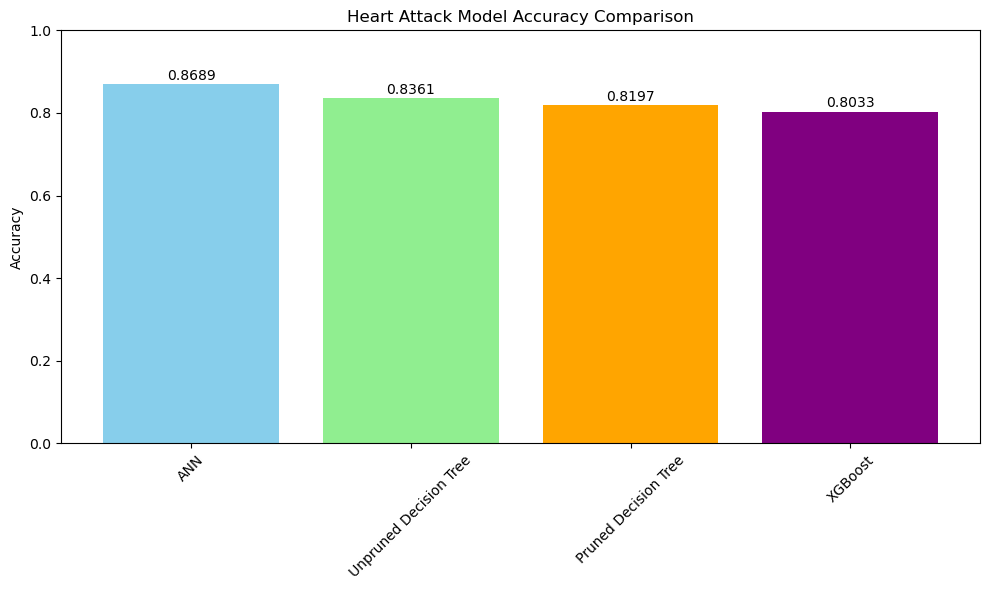

In [79]:
# Print the accuracies of all models
print("Model Accuracy Comparison:")
print(f"ANN Training Accuracy: {0.8689:.4f}")
print(f"Unpruned Decision Tree Test Accuracy: {acc_unpruned:.4f}")
print(f"Pruned Decision Tree Test Accuracy: {acc_pruned:.4f}")
print(f"XGBoost Training Accuracy: {test_accuracy:.4f}")

# Create a list of model names and their corresponding accuracies
models = ['ANN', 'Unpruned Decision Tree', 'Pruned Decision Tree', 'XGBoost']
accuracies = [0.8689, acc_unpruned, acc_pruned, test_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'purple'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.ylabel('Accuracy')
plt.title('Heart Attack Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the accuracy values on top of the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center')

plt.show()

## KNN Algorithm

K-Nearest Neighbors Classifier Results:
Training Accuracy: 0.7603
Testing Accuracy: 0.6885
Training Precision: 0.7605
Testing Precision: 0.6888
Training Recall: 0.7603
Testing Recall: 0.6885
Training F1 Score: 0.7585
Testing F1 Score: 0.6870


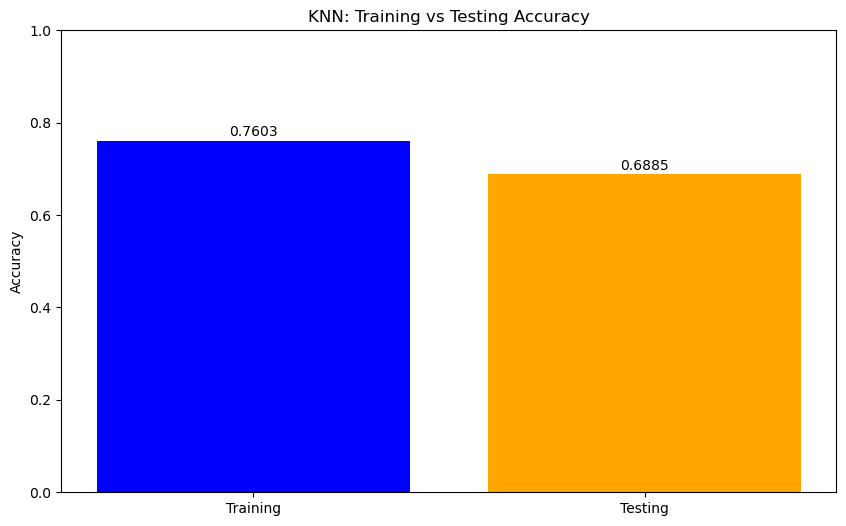

In [82]:
# Initialize the KNN classifier with a specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("K-Nearest Neighbors Classifier Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Testing Precision: {test_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Testing Recall: {test_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

# Plot training vs testing accuracy
plt.figure(figsize=(10, 6))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('KNN: Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([train_accuracy, test_accuracy]):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

## Comparing ANN, DT, XGBoost & KNN Algorithm

Model Accuracy Comparison:
ANN Training Accuracy: 0.8689
Unpruned Decision Tree Test Accuracy: 0.8361
Pruned Decision Tree Test Accuracy: 0.8197
XGBoost Training Accuracy: 0.8033
KNN Training Accuracy: 0.6885


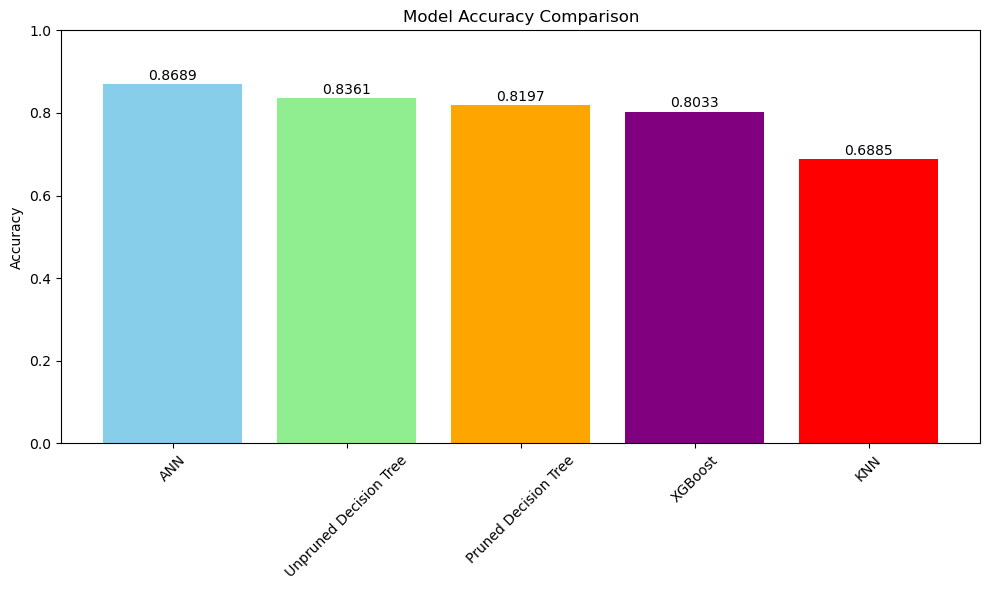

In [87]:
# Print the accuracies of all models
print("Model Accuracy Comparison:")
print(f"ANN Training Accuracy: {0.8689:.4f}")
print(f"Unpruned Decision Tree Test Accuracy: {acc_unpruned:.4f}")
print(f"Pruned Decision Tree Test Accuracy: {acc_pruned:.4f}")
print(f"XGBoost Training Accuracy: {0.8033:.4f}")
print(f"KNN Training Accuracy: {test_accuracy:.4f}")

# Create a list of model names and their corresponding accuracies
models = ['ANN', 'Unpruned Decision Tree', 'Pruned Decision Tree', 'XGBoost', 'KNN']
accuracies = [0.8689, acc_unpruned, acc_pruned, 0.8033, test_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'purple', 'red'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the accuracy values on top of the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center')

plt.show()